In [1]:
from datasets import load_dataset

dataset = load_dataset("cifar10")

C:\Users\Pratch\miniconda3\envs\metaclip-test\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'label'],
        num_rows: 10000
    })
})

In [3]:
# Accessing the 'train' subset
train_subset = dataset['train']

# Accessing the features and labels within the 'train' subset
train_images = train_subset['img']
train_labels = train_subset['label']

# Now you can work with train_images and train_labels


In [4]:
train_subset

Dataset({
    features: ['img', 'label'],
    num_rows: 50000
})

In [5]:
train_images

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32>,
 <PIL.Pn

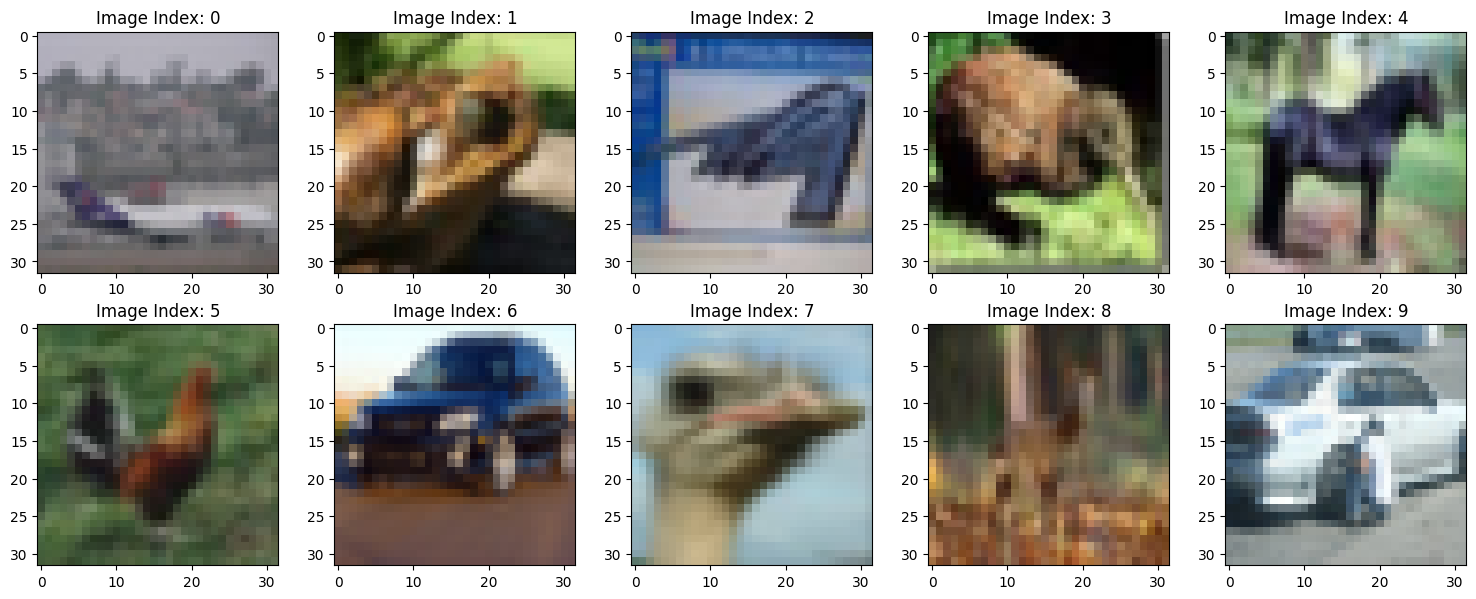

In [6]:
import matplotlib.pyplot as plt
# Create a figure with a 2x5 grid layout for images
fig, axs = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns

# Display the first 10 images in a 2x5 grid
for idx, img in enumerate(train_images[:10]):  # Limit to the first 10 images
  row = idx // 5  # Calculate the row index for subplot
  col = idx % 5   # Calculate the column index for subplot
  axs[row, col].imshow(img)
  axs[row, col].set_title(f"Image Index: {idx}")  # Set the title as the index

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

In [7]:
import torch
from PIL import Image
import open_clip

# Load the OpenCLIP model and pre-processing functions
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32-quickgelu', pretrained='metaclip_400m')

# Process and encode the images using OpenCLIP
with torch.no_grad():
  image_features_list = []  # To store the encoded features of each image

  for img in train_images[:10]:
    processed_img = preprocess(img).unsqueeze(0)
    image_features = model.encode_image(processed_img)
    image_features /= image_features.norm(dim=-1, keepdim=True)
    image_features_list.append(image_features)

  # Now image_features_list contains the encoded features for each image in image_list

In [8]:
image_features_list[0].size()

torch.Size([1, 512])

In [9]:
import json
import os
import torch
from PIL import Image
import open_clip

# Function to generate image embeddings
def generate_image_embedding(img):
  image = preprocess(img).unsqueeze(0)
  with torch.no_grad():
      image_features = model.encode_image(image)
      image_features /= image_features.norm(dim=-1, keepdim=True)
  return image_features.flatten().numpy().tolist()

In [12]:
import os
import json

output_directory = "output"

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
  os.makedirs(output_directory)

output_file_path = os.path.join(output_directory, "output-limited-100.json")

# Initialize a dictionary to hold 100 images per class
limited_data = []

# Loop through the train_images and train_labels to select 100 images per class
count_per_class = {str(i): 0 for i in range(10)}

for idx, img in enumerate(train_images):
  label = train_labels[idx]
  if count_per_class[str(label)] < 100:
    # Reconstructing data with image paths and embeddings
    row_data = {
      "index": idx,
      "label": label,
      "embedded": generate_image_embedding(img)  # Generate embedding here
    }

    limited_data.append(row_data)
    count_per_class[str(label)] += 1

# Create the final JSON structure
result_json = {
  "rows": limited_data
}

# Write the limited JSON structure to the output file
with open(output_file_path, 'w') as output_file:
  json.dump(result_json, output_file, indent=2)

print(f"Limited data (100 images per class) written to {output_file_path}")

Limited data (100 images per class) written to output\output-limited-100.json
